In [121]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


### Leemos y guardamos todos los csv:

In [122]:
df_final_demo = pd.read_csv('df_final_demo.csv')
df_final_experiment_clients =pd.read_csv("df_final_experiment_clients.csv")
df_final_web_data_1 = pd.read_csv('df_final_web_data_pt_1.csv')
df_final_web_data_2 = pd.read_csv('df_final_web_data_pt_2.csv')

In [123]:
df_final_demo.columns

Index(['client_id', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'gendr',
       'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth'],
      dtype='object')

### Unificamos los que nos interese

In [124]:
df_final_web_data = pd.concat([df_final_web_data_1, df_final_web_data_2], ignore_index=True)
df_final_web_data.head()

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04


### Vamos a explorar los datasets que tenemos, a cambiar el nombre de algunas columnas y sus tipos

In [125]:
df_final_demo

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0


In [126]:
df_final_demo.nunique()

client_id           70609
clnt_tenure_yr         54
clnt_tenure_mnth      482
clnt_age              165
gendr                   4
num_accts               8
bal                 70328
calls_6_mnth            8
logons_6_mnth           9
dtype: int64

In [127]:
df_final_demo=df_final_demo.rename(columns={
    'clnt_tenure_yr':'años_cliente_vg',
    'clnt_tenure_mnth':'meses_cliente_vg',
    'gendr':'genero',
    'clnt_age':'edad',
    'num_accts':'num_cuentas',
    'calls_6_mnth':'llamadas_6_meses',
    'logons_6_mnth':'logins_6_meses',
    'bal':'saldo_total'                          
    })

### Creamos una función para cambiar el tipo de algunas columnas de float a int:

In [128]:
def cambio_entero(df, cols):
    df = df.copy()
    for col in cols:
        df[col] = df[col].round().astype('Int64')
    return df


In [129]:
print(df_final_demo.columns.tolist())

['client_id', 'años_cliente_vg', 'meses_cliente_vg', 'edad', 'genero', 'num_cuentas', 'saldo_total', 'llamadas_6_meses', 'logins_6_meses']


In [130]:
df_final_demo=cambio_entero(df_final_demo,['años_cliente_vg'])
df_final_demo=cambio_entero(df_final_demo,['meses_cliente_vg'])
df_final_demo=cambio_entero(df_final_demo,['num_cuentas'])
df_final_demo=cambio_entero(df_final_demo,['llamadas_6_meses'])
df_final_demo=cambio_entero(df_final_demo,['logins_6_meses'])
df_final_demo=cambio_entero(df_final_demo,['edad'])
df_final_demo= df_final_demo.dropna()
df_final_demo






,client_id,años_cliente_vg,meses_cliente_vg,edad,genero,num_cuentas,saldo_total,llamadas_6_meses,logins_6_meses
0,836976,6,73,60,U,2,45105.30,6,9
1,2304905,7,94,58,U,2,110860.30,6,9
2,1439522,5,64,32,U,2,52467.79,6,9
3,1562045,16,198,49,M,2,67454.65,3,6
4,5126305,12,145,33,F,2,103671.75,0,3
...,...,...,...,...,...,...,...,...,...
70604,7993686,4,56,38,U,3,1411062.68,5,5
70605,8981690,12,148,31,M,2,101867.07,6,6
70606,333913,16,198,62,F,2,40745.00,3,3
70607,1573142,21,255,68,M,3,475114.69,4,4


### Ahora vamos con el siguiente dataframe

In [131]:
df_final_experiment_clients

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
70604,2443347,NaN
70605,8788427,NaN
70606,266828,NaN
70607,1266421,NaN


### Último dataframe:

In [132]:
df_final_web_data

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
755400,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
755401,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
755402,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
755403,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [133]:
df_final_web_data.dtypes

client_id        int64
visitor_id      object
visit_id        object
process_step    object
date_time       object
dtype: object

In [134]:
df_final_web_data.nunique()

client_id       120157
visitor_id      130236
visit_id        158095
process_step         5
date_time       629363
dtype: int64

In [135]:
df_final_web_data=df_final_web_data.rename(columns={
    'visit_id':'visita_id',
    'visitor_id':'cliente_disp_id',
    'process_step':'estado_proceso',
    'date_time':'fecha_hora'
                              
                              })

In [136]:
#Comparar edad clientes y en vanguard
df_final_demo[df_final_demo["edad"] < df_final_demo["años_cliente_vg"]]


,client_id,años_cliente_vg,meses_cliente_vg,edad,genero,num_cuentas,saldo_total,llamadas_6_meses,logins_6_meses
108,7449147,27,330,26,F,2,215247.66,3,6
970,4955883,29,349,26,F,2,37122.69,2,5
1138,1330615,23,285,18,M,2,35553.33,3,6
1194,4286237,21,257,18,F,2,32577.78,5,8
1840,6435592,23,285,20,F,2,33384.66,4,7
...,...,...,...,...,...,...,...,...,...
70420,6911362,30,361,23,F,2,51142.87,3,3
70437,699213,23,286,17,M,2,29734.42,6,6
70439,6672629,24,299,23,U,4,91746.29,4,4
70479,9696505,20,250,18,F,2,15010.15,2,2


In [137]:
df_final_experiment_clients=df_final_experiment_clients.dropna()
df_final_experiment_clients

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
50495,393005,Control
50496,2908510,Control
50497,7230446,Test
50498,5230357,Test


## Vamos a modificar la columna de género

In [138]:
df_final_demo_1 = df_final_demo.query("genero != 'U' and genero != 'other' and genero != 'X'")

In [139]:
df_final_demo_1

,client_id,años_cliente_vg,meses_cliente_vg,edad,genero,num_cuentas,saldo_total,llamadas_6_meses,logins_6_meses
3,1562045,16,198,49,M,2,67454.65,3,6
4,5126305,12,145,33,F,2,103671.75,0,3
7,388801,30,361,58,M,5,522498.72,1,4
8,285619,30,369,68,M,2,299388.72,3,6
9,8198645,15,189,54,F,2,382303.83,6,9
...,...,...,...,...,...,...,...,...,...
70602,7979279,4,49,35,F,2,40441.45,3,3
70605,8981690,12,148,31,M,2,101867.07,6,6
70606,333913,16,198,62,F,2,40745.00,3,3
70607,1573142,21,255,68,M,3,475114.69,4,4


In [140]:
df_final_web_data.to_csv('df_final_web_data', index=False)
df_final_web_data.columns

Index(['client_id', 'cliente_disp_id', 'visita_id', 'estado_proceso',
       'fecha_hora'],
      dtype='object')

## Vamos a modificar la fecha y hora para poder utilizar estos valores de forma más sencilla durante el proyecto

In [141]:
#Vamos a pasar el formato de texto  a fecha:
df_final_web_data['fecha_hora'] = pd.to_datetime(df_final_web_data['fecha_hora'])
df_final_web_data.dtypes

client_id                   int64
cliente_disp_id            object
visita_id                  object
estado_proceso             object
fecha_hora         datetime64[ns]
dtype: object

In [142]:
start_date = '2017-03-15'
end_date = '2017-06-20'

In [143]:
#Nos quedamos sólo con las fechas dentro del rango del experimento(15/3/2017 al 20/6/2017)
df_final_web_data = df_final_web_data[(df_final_web_data['fecha_hora'] >= start_date) & (df_final_web_data['fecha_hora'] <= end_date)]

In [144]:
#Separamos en dos columnas, año y hora
#df_final_web_data['año'] = df_final_web_data['fecha_hora'].dt.year
#df_final_web_data['hora'] = df_final_web_data['fecha_hora'].dt.strftime('%H:%M:%S')

In [145]:
df_final_web_data = df_final_web_data.sort_values(['visita_id', 'fecha_hora'])

In [146]:

#Vamos a hacer que estado_proceso sea categórica ordenada para poder filtrar después fácilmente:
orden = ['start', 'step_1', 'step_2', 'step_3', 'confirm']
df_final_web_data['estado_proceso'] = pd.Categorical(df_final_web_data['estado_proceso'], categories=orden, ordered=True)

In [147]:
df_final_web_data

,client_id,cliente_disp_id,visita_id,estado_proceso,fecha_hora
108614,3561384,451664975_1722933822,100012776_37918976071_457913,confirm,2017-04-26 13:22:17
108613,3561384,451664975_1722933822,100012776_37918976071_457913,confirm,2017-04-26 13:23:09
447951,9056452,306992881_89423906595,1000165_4190026492_760066,start,2017-06-04 01:07:29
447950,9056452,306992881_89423906595,1000165_4190026492_760066,step_1,2017-06-04 01:07:32
447949,9056452,306992881_89423906595,1000165_4190026492_760066,step_2,2017-06-04 01:07:56
...,...,...,...,...,...
539055,7149380,483112224_46340533900,999992932_41666455053_671149,step_1,2017-06-06 15:46:24
539054,7149380,483112224_46340533900,999992932_41666455053_671149,step_2,2017-06-06 15:47:32
539072,7149380,483112224_46340533900,999992932_41666455053_671149,step_3,2017-06-06 16:01:46
539071,7149380,483112224_46340533900,999992932_41666455053_671149,confirm,2017-06-06 16:04:08


In [148]:
df_final_demo_1

,client_id,años_cliente_vg,meses_cliente_vg,edad,genero,num_cuentas,saldo_total,llamadas_6_meses,logins_6_meses
3,1562045,16,198,49,M,2,67454.65,3,6
4,5126305,12,145,33,F,2,103671.75,0,3
7,388801,30,361,58,M,5,522498.72,1,4
8,285619,30,369,68,M,2,299388.72,3,6
9,8198645,15,189,54,F,2,382303.83,6,9
...,...,...,...,...,...,...,...,...,...
70602,7979279,4,49,35,F,2,40441.45,3,3
70605,8981690,12,148,31,M,2,101867.07,6,6
70606,333913,16,198,62,F,2,40745.00,3,3
70607,1573142,21,255,68,M,3,475114.69,4,4


In [149]:
#Vamos a hacer un merge left del df_final_experiment_clients en df_final_demo_1
# para ver a qué grupo del test pertenece cada ID  directamente en esa tabla.
df_final_web_data = df_final_web_data.merge(df_final_experiment_clients, on='client_id', how='left')
df_final_web_data.dropna
df_final_web_data


,client_id,cliente_disp_id,visita_id,estado_proceso,fecha_hora,Variation
0,3561384,451664975_1722933822,100012776_37918976071_457913,confirm,2017-04-26 13:22:17,Test
1,3561384,451664975_1722933822,100012776_37918976071_457913,confirm,2017-04-26 13:23:09,Test
2,9056452,306992881_89423906595,1000165_4190026492_760066,start,2017-06-04 01:07:29,NaN
3,9056452,306992881_89423906595,1000165_4190026492_760066,step_1,2017-06-04 01:07:32,NaN
4,9056452,306992881_89423906595,1000165_4190026492_760066,step_2,2017-06-04 01:07:56,NaN
...,...,...,...,...,...,...
747568,7149380,483112224_46340533900,999992932_41666455053_671149,step_1,2017-06-06 15:46:24,NaN
747569,7149380,483112224_46340533900,999992932_41666455053_671149,step_2,2017-06-06 15:47:32,NaN
747570,7149380,483112224_46340533900,999992932_41666455053_671149,step_3,2017-06-06 16:01:46,NaN
747571,7149380,483112224_46340533900,999992932_41666455053_671149,confirm,2017-06-06 16:04:08,NaN


In [158]:
df_final_web_data

<bound method DataFrame.dropna of         client_id        cliente_disp_id                     visita_id  \
0         3561384   451664975_1722933822  100012776_37918976071_457913   
1         3561384   451664975_1722933822  100012776_37918976071_457913   
2         9056452  306992881_89423906595     1000165_4190026492_760066   
3         9056452  306992881_89423906595     1000165_4190026492_760066   
4         9056452  306992881_89423906595     1000165_4190026492_760066   
...           ...                    ...                           ...   
747568    7149380  483112224_46340533900  999992932_41666455053_671149   
747569    7149380  483112224_46340533900  999992932_41666455053_671149   
747570    7149380  483112224_46340533900  999992932_41666455053_671149   
747571    7149380  483112224_46340533900  999992932_41666455053_671149   
747572    7149380  483112224_46340533900  999992932_41666455053_671149   

       estado_proceso          fecha_hora Variation  
0             confirm 2

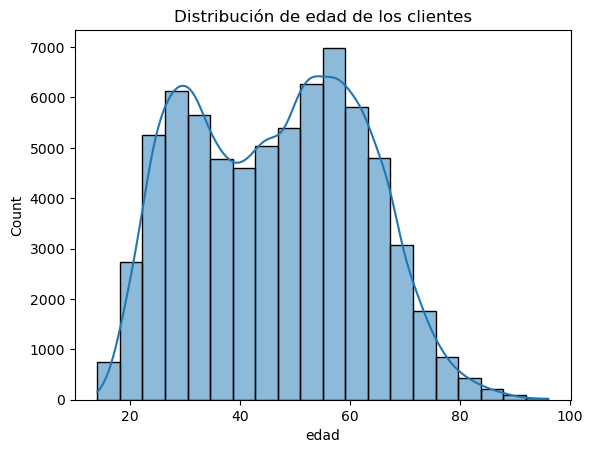

In [151]:
sns.histplot(df_final_demo['edad'], kde=True, bins=20)
plt.title('Distribución de edad de los clientes')
plt.show()

In [152]:
sns.boxplot(x='variation', y='años_cliente_vg', data=df_final_demo)
plt.title('Antigüedad del cliente según grupo de experimento')

ValueError: Could not interpret value `variation` for `x`. An entry with this name does not appear in `data`.